<a href="https://colab.research.google.com/github/kcarroth-dev/KarltonCarrothers_ML/blob/main/ECGR4105_Hw1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
#import libraries needed for code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [372]:
# Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/kcarroth-dev/KarltonCarrothers_ML/main/D3.csv'
df = pd.read_csv(url)


In [373]:
# Separate features and labels
x1 = df.values[:, 0]  # get input values from first column -- X1 is a list here
x2 = df.values[:, 1]  # get output values from second column -- X2 is the list here
x3 = df.values[:, 2]  # get input values from first column -- X3 is a list here
y = df.values[:, 3]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X1)  # Number of training examples


In [374]:
# Display first 5 records and the total number of training examples
print('x1 = ', x1[: 5])
print('x2 = ', x2[: 5])
print('x3 = ', x3[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
x2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
x3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


In [375]:
#display parameters with graph library
from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


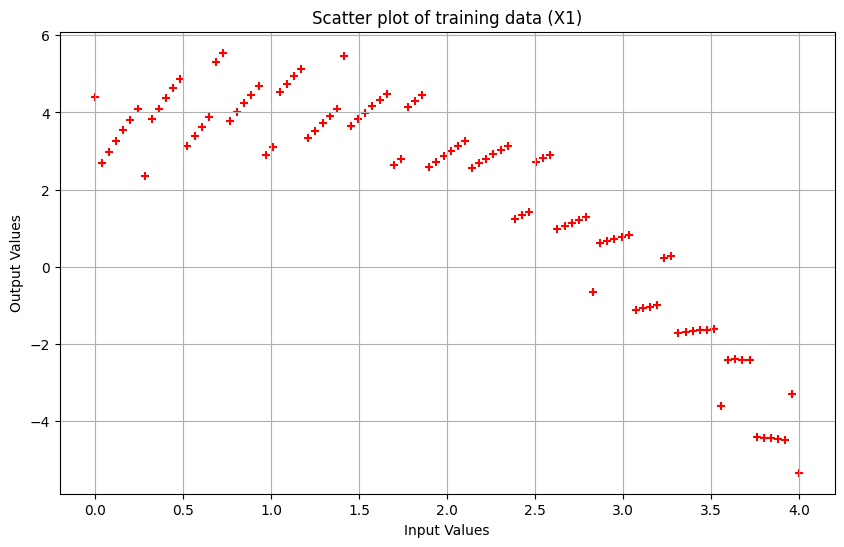

In [376]:
x1 = df.values[:, 0]  # get input values from the first column -- x1 is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(x1, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.title('Scatter plot of training data (X1)')

# Show the plot
plt.show()

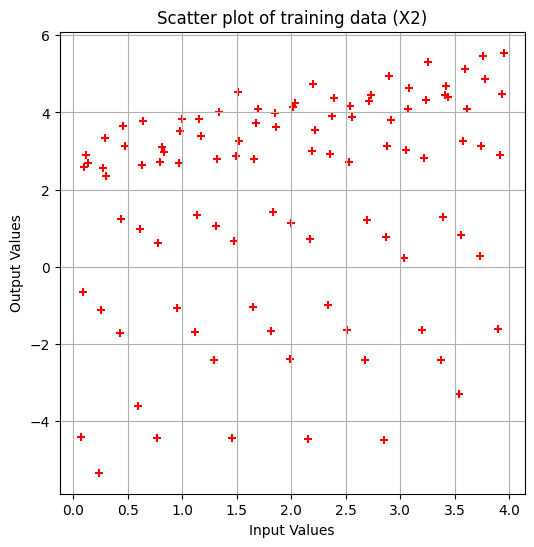

In [377]:
x2 = df.values[:, 1]  # get input values from the first column -- x2 is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(x2, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.title('Scatter plot of training data (X2)')

# Show the plot
plt.show()

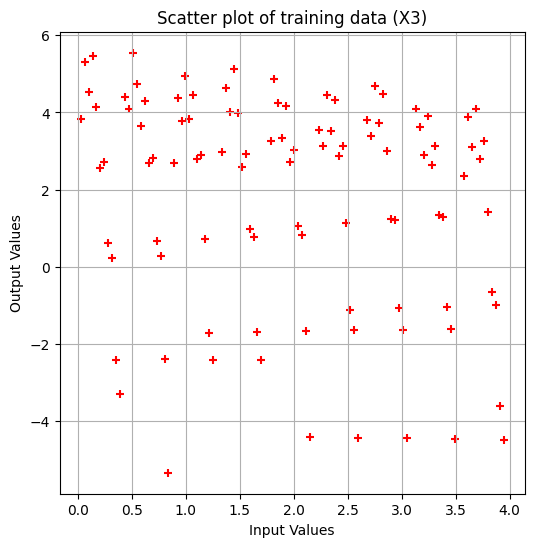

In [378]:
x3 = df.values[:, 2]  # get input values from the first column -- x2 is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(x3, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.title('Scatter plot of training data (X3)')

# Show the plot
plt.show()

In [379]:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
X_0 = np.ones((m, 1))
#X_1 = x1.reshape(m, 1): You're reshaping features (x1) to make it a 2D array suitable for matrix operations.
X_1 = x1.reshape(m, 1)
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
# Create theta array
theta = np.zeros(2)

In [380]:
def compute_x1(X, y, theta):
    """
    Compute x1 for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [381]:
# Lets compute the cost for theta values
cost = compute_x1(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [382]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_x1(X, y, theta)

    return theta, cost_history

In [383]:
#Varibles for linear regression model for x1
theta = [0., 0.]
iterations = 3000
alpha = 0.01

In [384]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.92043383 -2.03541173]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.98500035 0.98500032 0.98500029]


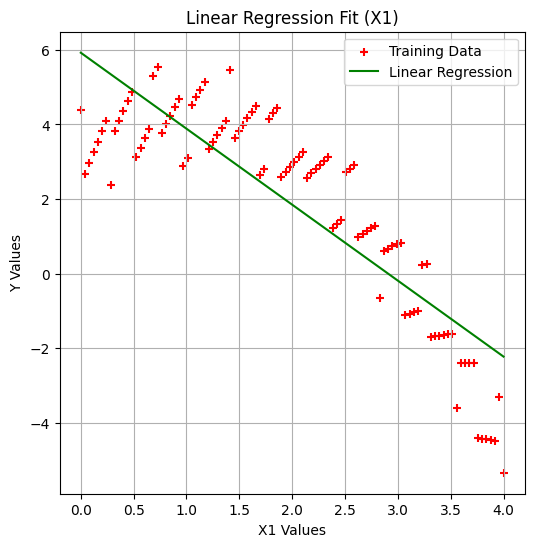

In [385]:
# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1 Values')
plt.ylabel('Y Values')
plt.title('Linear Regression Fit (X1)')
plt.legend()

# Show the plot
plt.show()


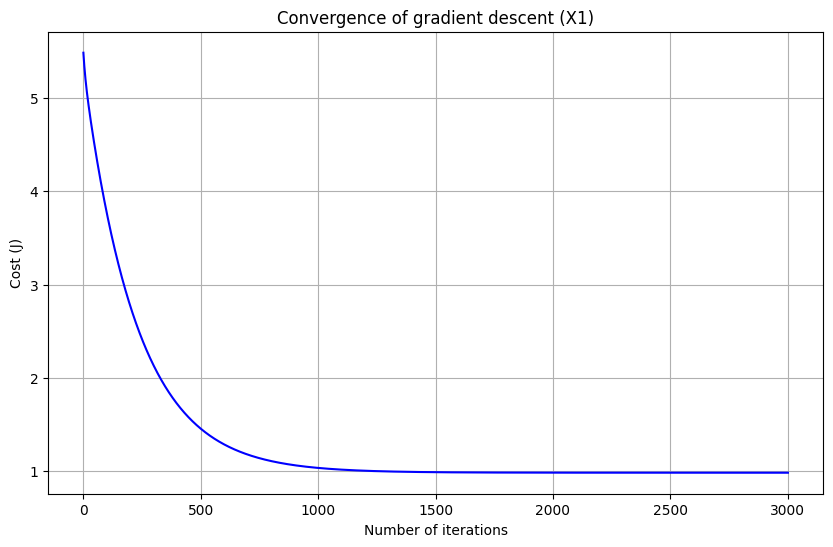

In [386]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent (X1)')

# Show the plot
plt.show()

In [387]:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
X_0 = np.ones((m, 1))
#X_1 = x1.reshape(m, 1): You're reshaping features (x2) to make it a 2D array suitable for matrix operations.
X_1 = x2.reshape(m, 1)
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
# Create theta array
theta = np.zeros(2)

In [388]:
def compute_x2(X, y, theta):
    """
    Compute x2 for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [389]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_x2(X, y, theta)

    return theta, cost_history

In [390]:
#Varibles for linear regression model for x1
theta = [0., 0.]
iterations = 3000
alpha = 0.001

In [391]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [0.50420806 0.6478467 ]
cost_history = [5.50118218 5.47821041 5.45551967 ... 3.60622989 3.60622685 3.60622381]


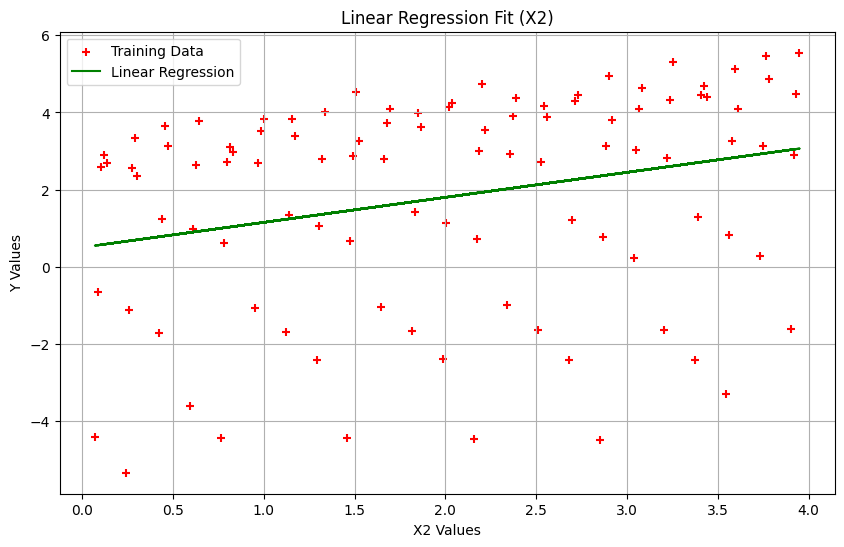

In [392]:
# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X2 Values')
plt.ylabel('Y Values')
plt.title('Linear Regression Fit (X2)')
plt.legend()

# Show the plot
plt.show()

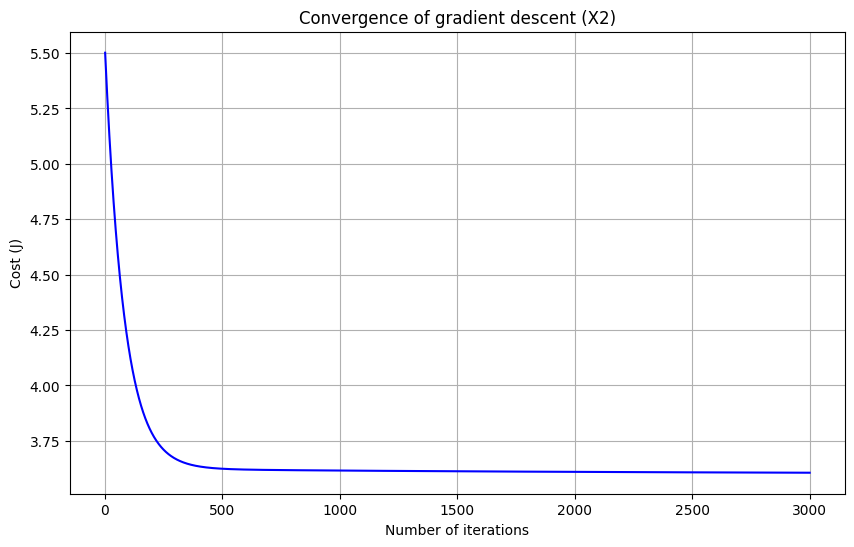

In [393]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent (X2)')

# Show the plot
plt.show()

In [394]:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
X_0 = np.ones((m, 1))
#X_1 = x1.reshape(m, 1): You're reshaping features (x3) to make it a 2D array suitable for matrix operations.
X_1 = x3.reshape(m, 1)
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
# Create theta array
theta = np.zeros(2)

In [395]:
def compute_x3(X, y, theta):
    """
    Compute x3 for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [396]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_x3(X, y, theta)

    return theta, cost_history

In [397]:
#Varibles for linear regression model for x1
theta = [0., 0.]
iterations = 3000
alpha = 0.009

In [398]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 2.86531238 -0.51806652]
cost_history = [5.41905141 5.32428632 5.23903649 ... 3.62945602 3.629456   3.62945598]


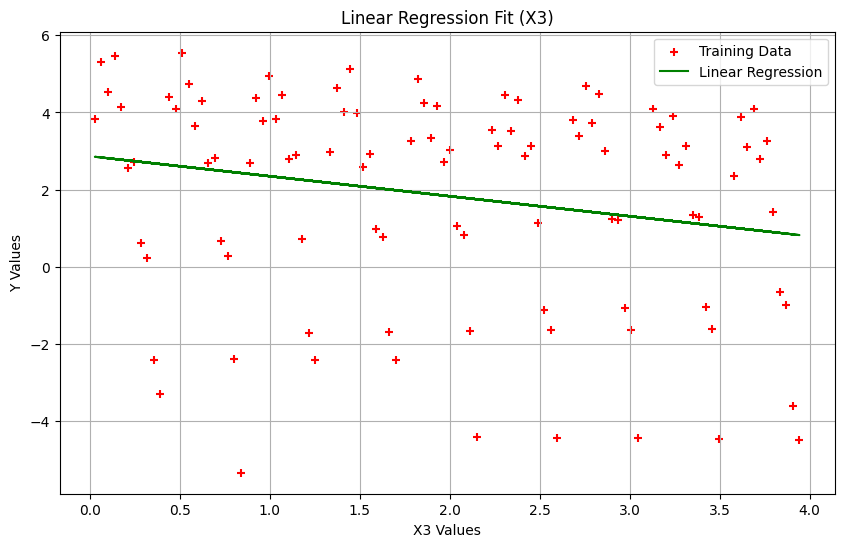

In [399]:
# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X3 Values')
plt.ylabel('Y Values')
plt.title('Linear Regression Fit (X3)')
plt.legend()

# Show the plot
plt.show()

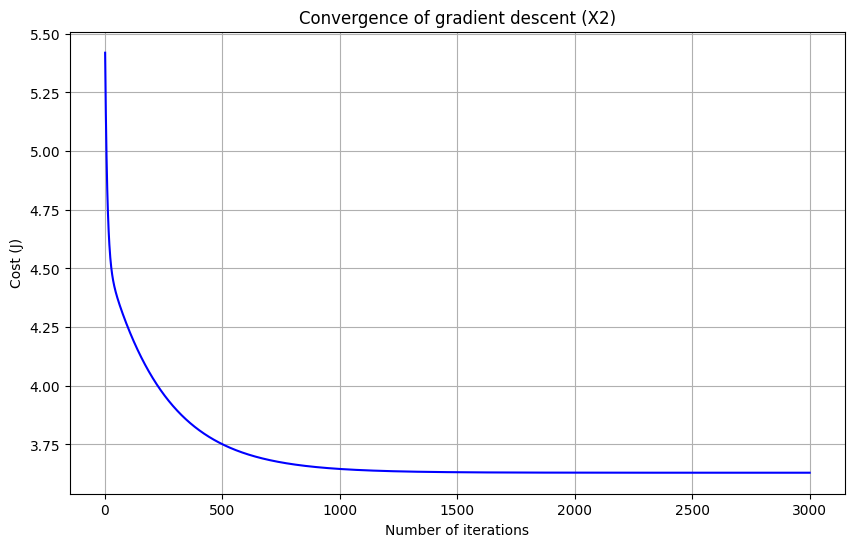

In [400]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent (X2)')

# Show the plot
plt.show()